In [1]:

%pylab inline

import tensorflow as tf
%matplotlib inline
import numpy as np
from collections import deque
from os import listdir
import functools

pylab.rcParams['figure.figsize'] = (4.0, 4.0)

import pylab
from matplotlib import pyplot as plt
import pandas
import scipy
import numpy as np
import sklearn.manifold
import os
import gc
from time import gmtime, strftime
import seaborn as sns
from os import listdir
from os.path import isfile, join
import math
from scipy.stats.stats import pearsonr
import random as rand
import pyproj
import functools
import pickle 

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Populating the interactive namespace from numpy and matplotlib
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [56]:
import tflearn
tf.reset_default_graph()


image_width = 28

image_data = tf.placeholder(tf.float32, [None, image_width, image_width, 1], name = 'image_data_placeholder')


print image_data.get_shape(), "<- image input"

network = tflearn.conv_2d(image_data, 32, 5, strides=1, activation='relu', regularizer="L2", weight_decay=0.0)
bottom_conv = network
network = tflearn.layers.conv.max_pool_2d (network, 4, strides=None, padding='same', name='MaxPool2D')
network = tflearn.layers.conv.upsample_2d (network, 4)
network = tflearn.layers.core.dropout (network, .5, name='Dropout')
middle = network

# network = tflearn.conv_2d_transpose(network, 16, 5, [image_width, image_width, 16], strides=1, activation='relu', 
#                                       regularizer="L2", weight_decay=0.0)

AE_output = tflearn.conv_2d_transpose(network, 1, 5, [image_width, image_width, 1], strides=1, activation='sigmoid', 
                                      regularizer="L2", weight_decay=0.0)


autoencoder_loss = tf.reduce_mean(tf.square(tf.sub(image_data, AE_output)) )
autoencoder_optimizer = tf.train.AdamOptimizer(learning_rate=.001).minimize(autoencoder_loss)

# saver = tf.train.Saver()

init = tf.initialize_all_variables()
# Launch the graph
sess = tf.Session()
sess.run(init)

batch_costs = []

(?, 28, 28, 1) <- image input


(5, 5, 1, 32)


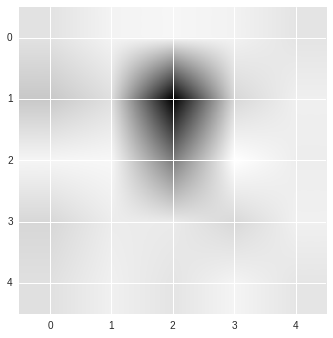

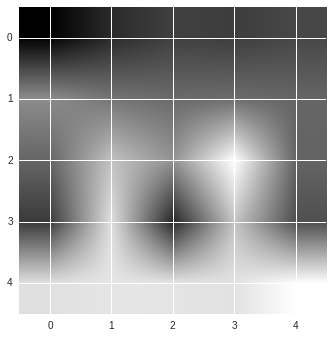

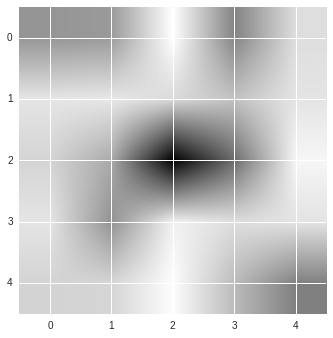

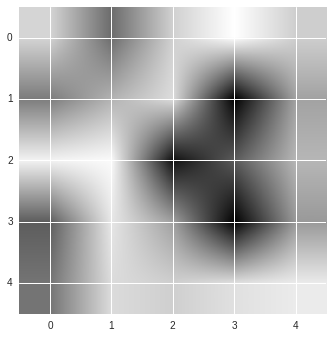

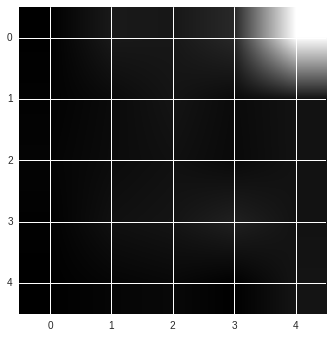

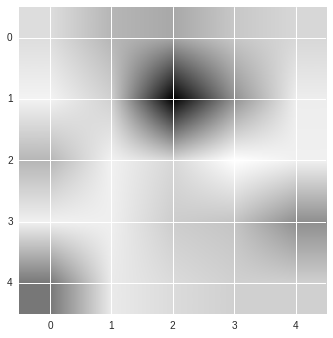

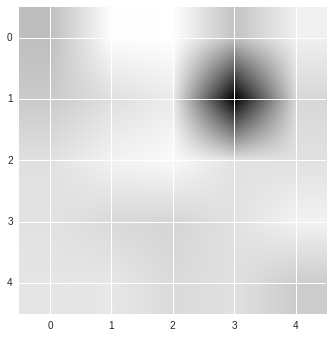

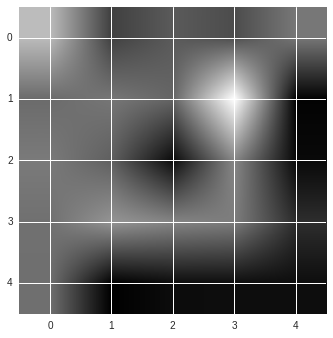

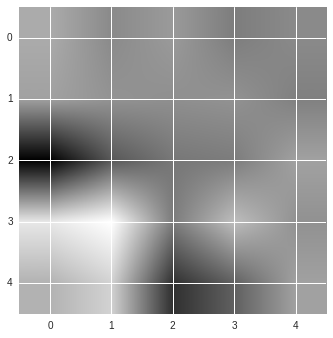

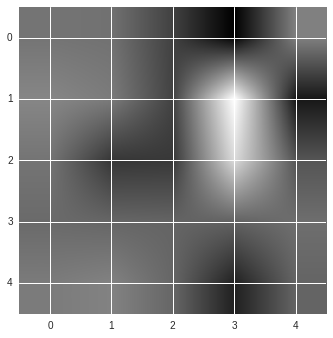

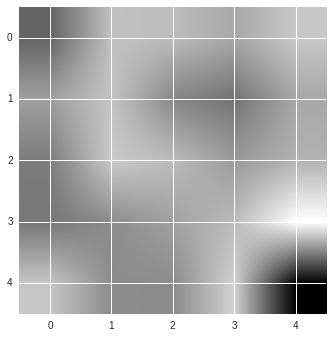

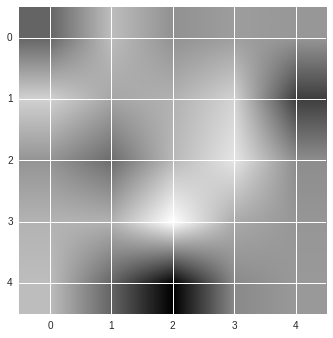

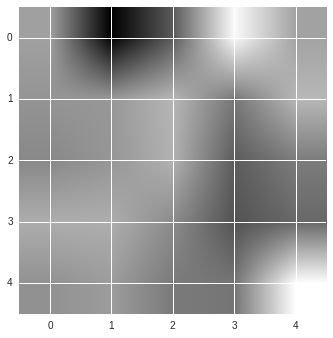

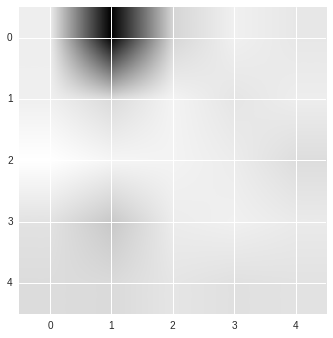

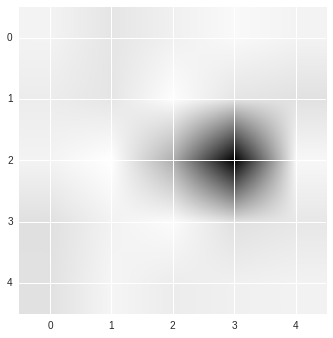

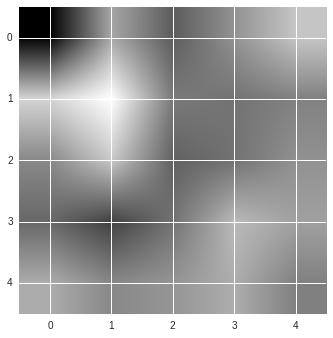

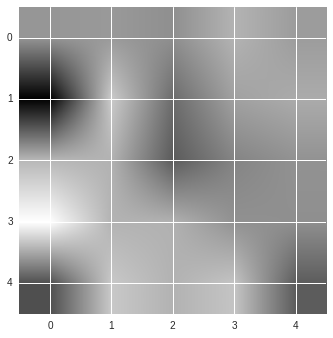

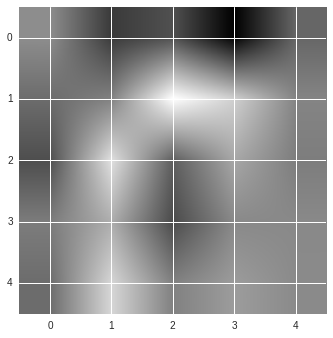

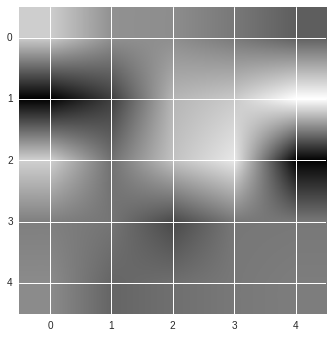

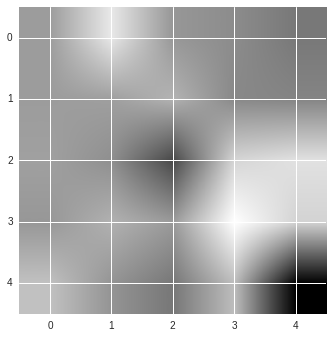

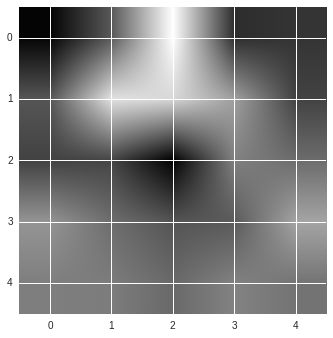

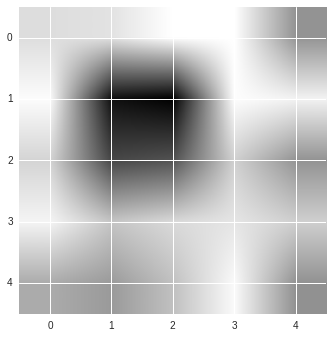

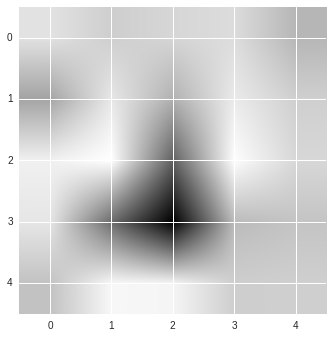

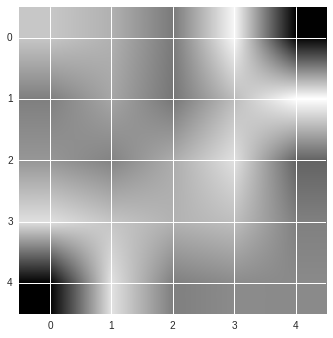

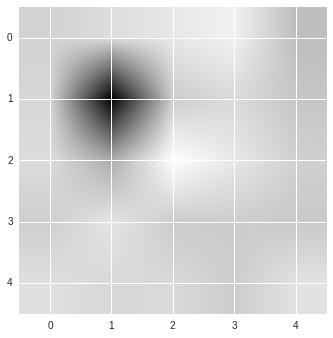

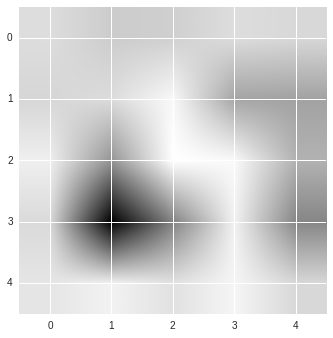

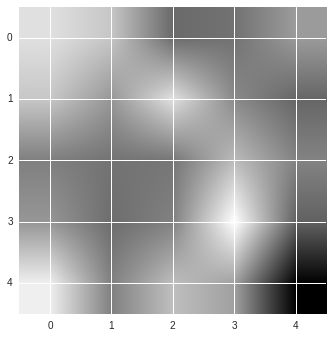

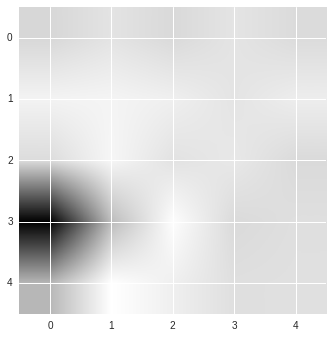

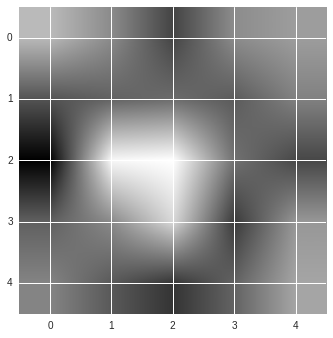

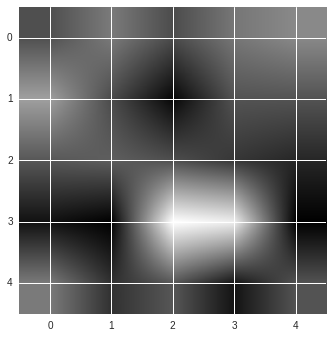

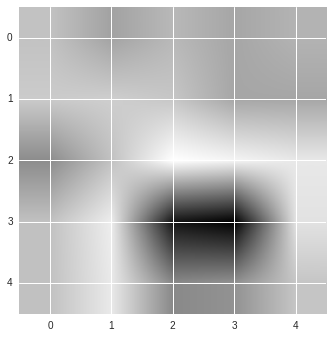

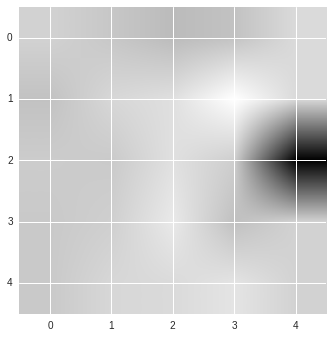

In [58]:
bottom_conv_weights = sess.run(bottom_conv.W)
print bottom_conv_weights.shape
for i in range(bottom_conv_weights.shape[-1]):
    plt.imshow(bottom_conv_weights[:,:,0,i])
    plt.show()
    


(5, 5, 1, 32)


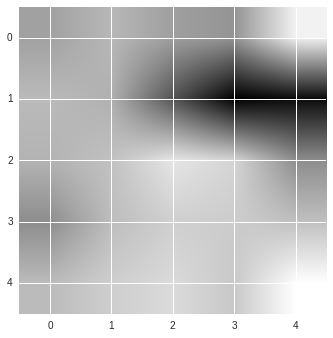

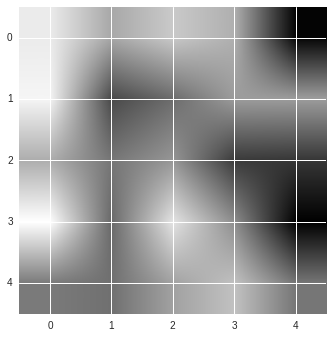

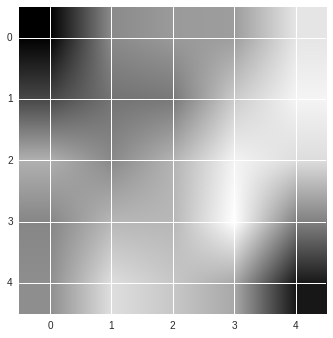

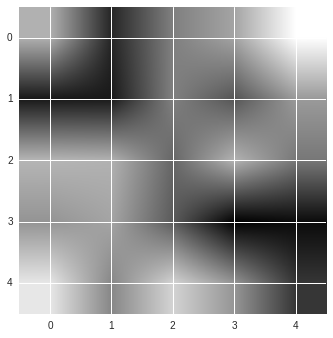

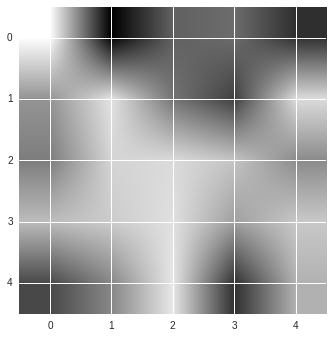

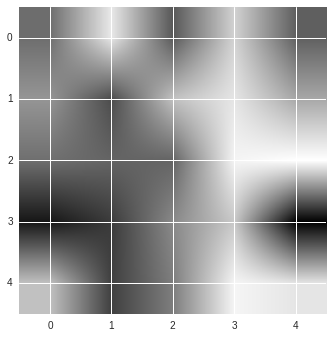

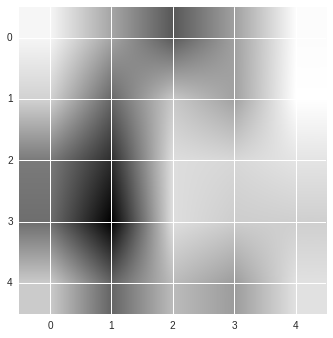

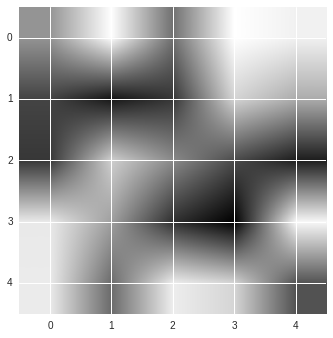

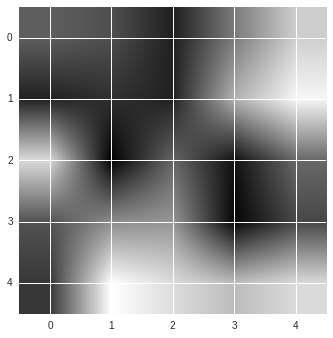

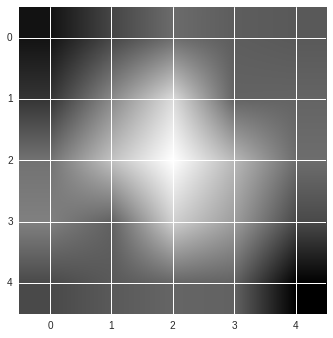

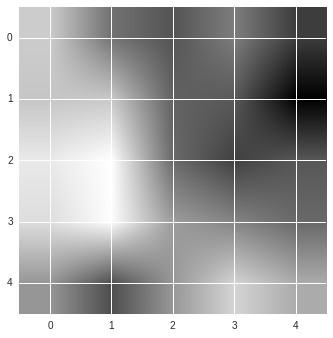

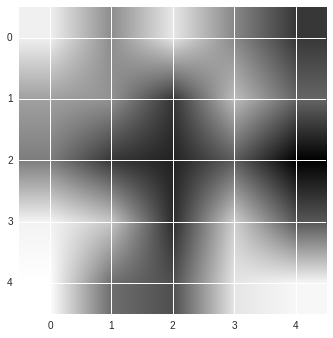

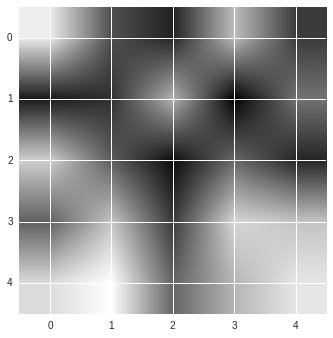

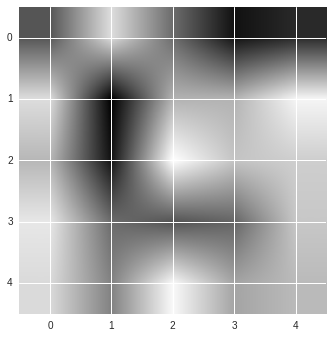

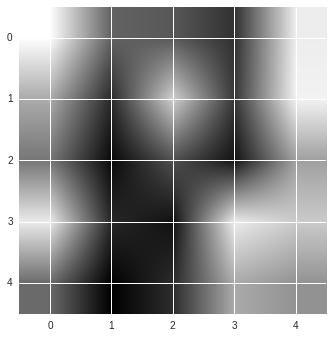

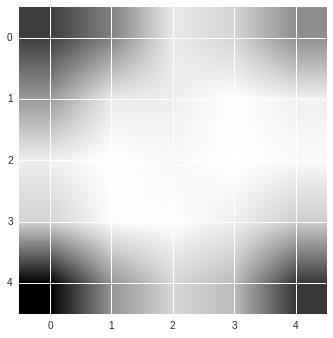

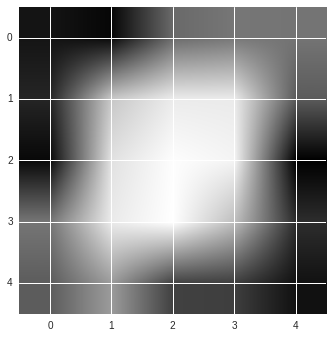

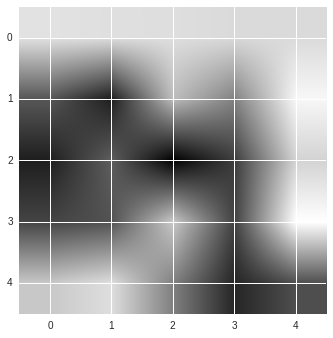

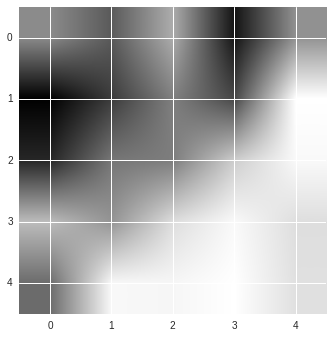

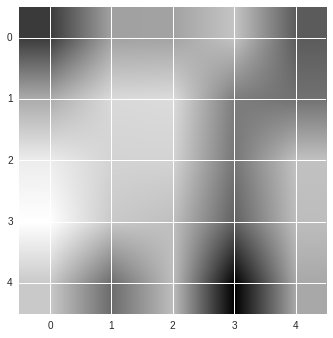

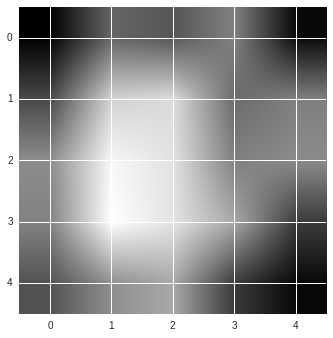

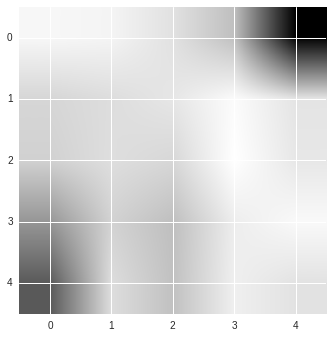

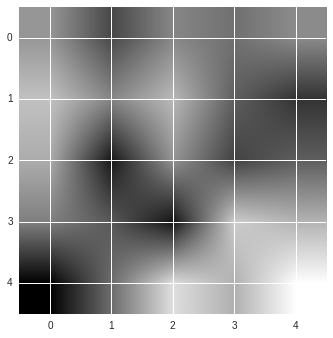

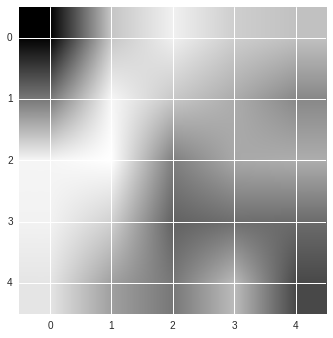

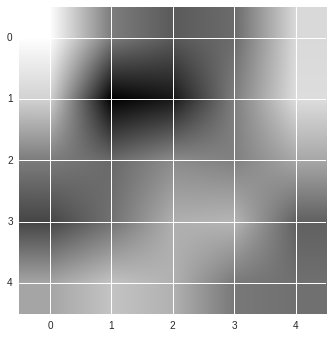

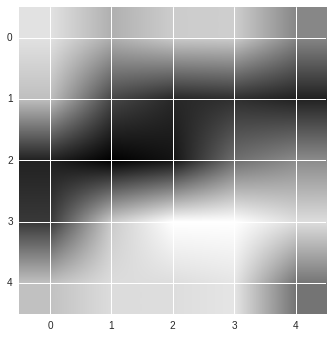

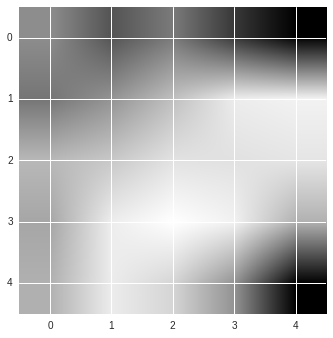

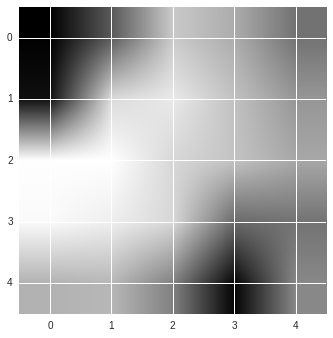

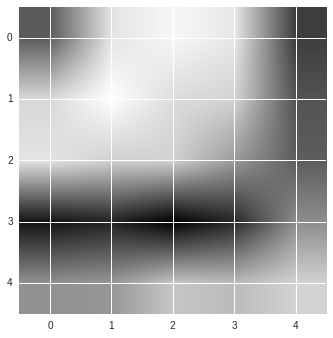

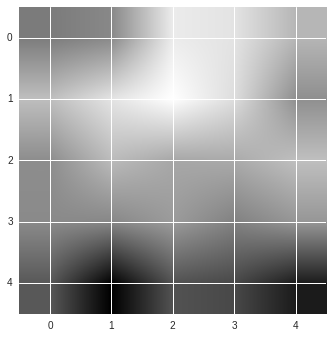

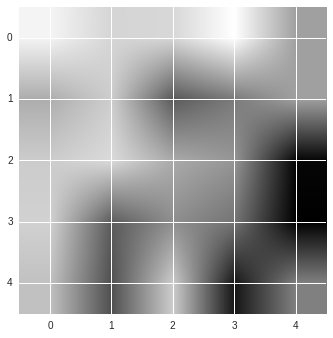

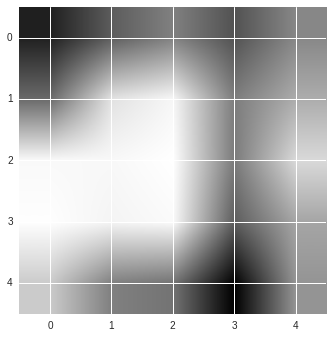

In [47]:
bottom_conv_weights = sess.run(AE_output.W)
print bottom_conv_weights.shape
for i in range(bottom_conv_weights.shape[-1]):
    plt.imshow(bottom_conv_weights[:,:,0,i])
    plt.show()
    
batch_costs = []

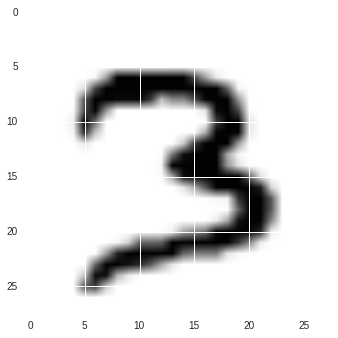

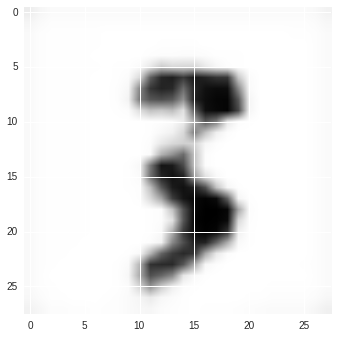

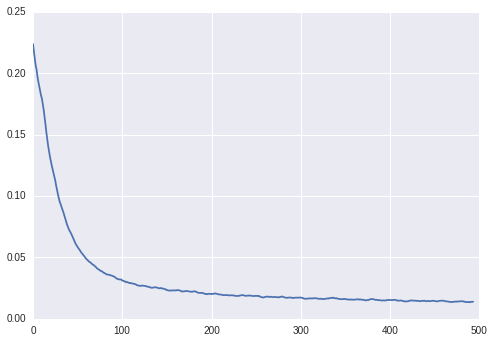

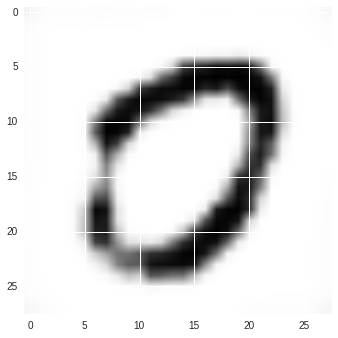

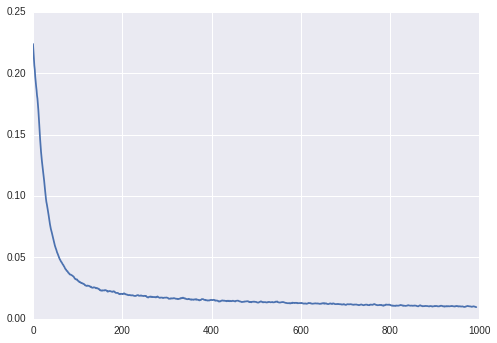

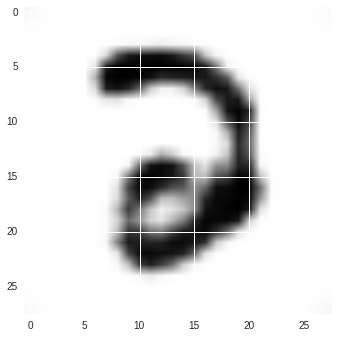

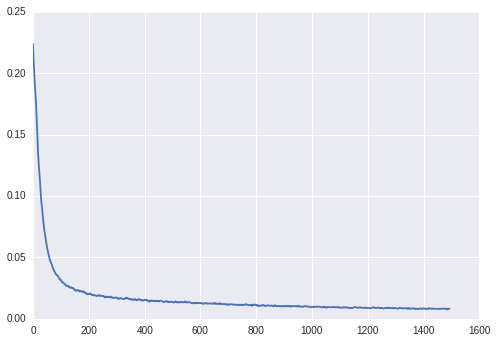

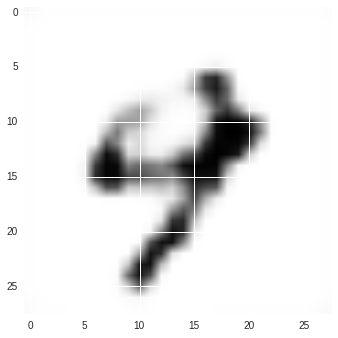

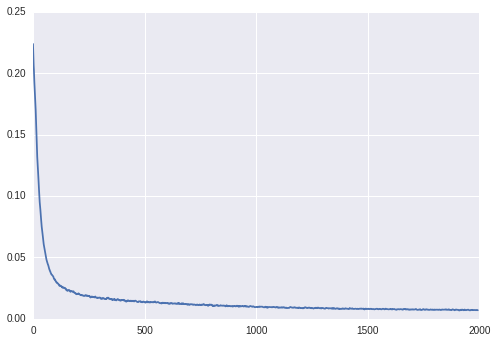

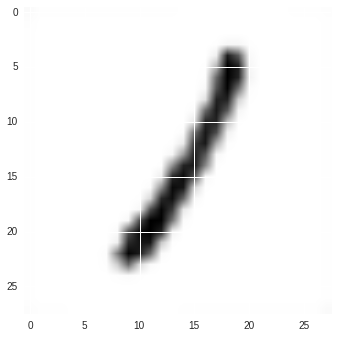

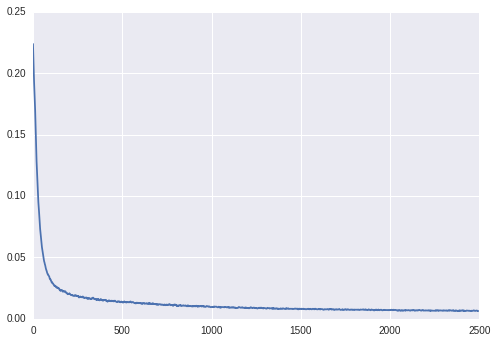

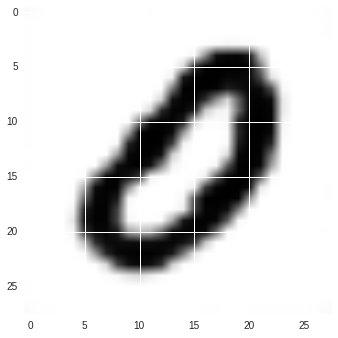

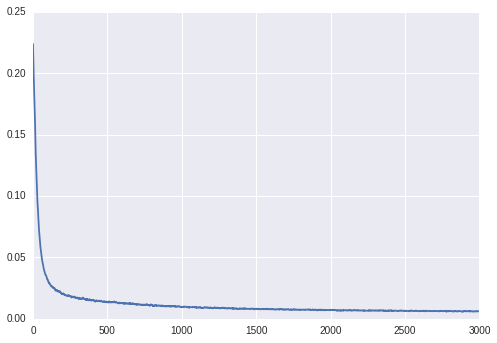

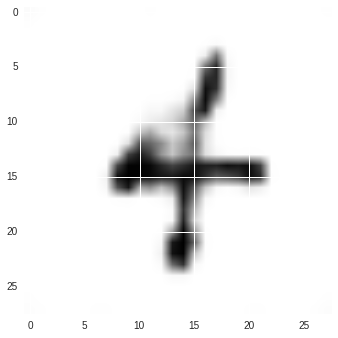

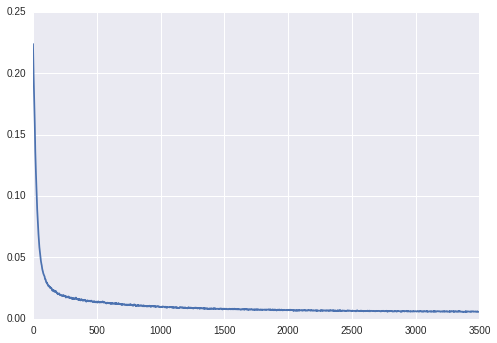

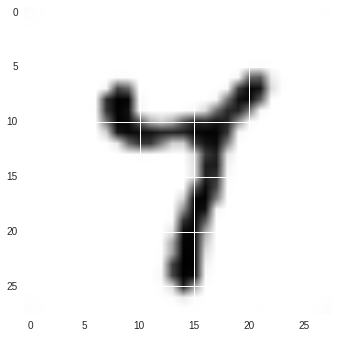

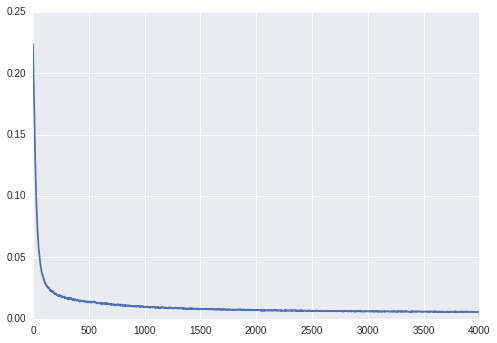

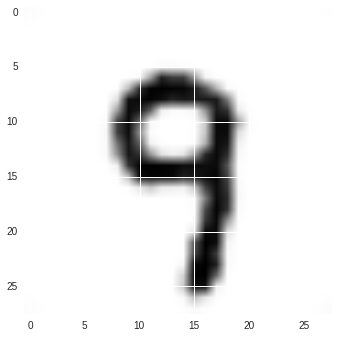

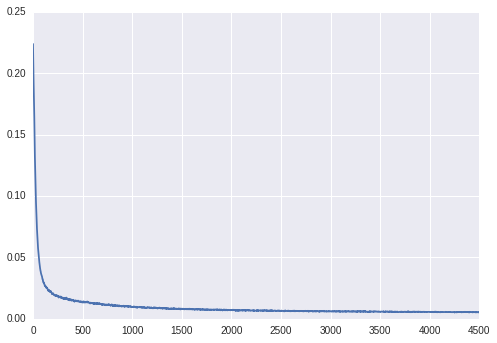

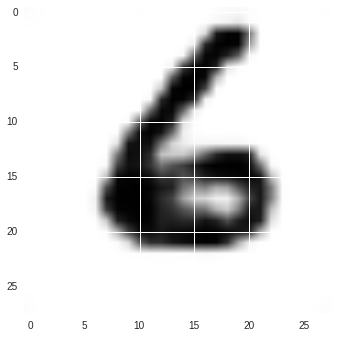

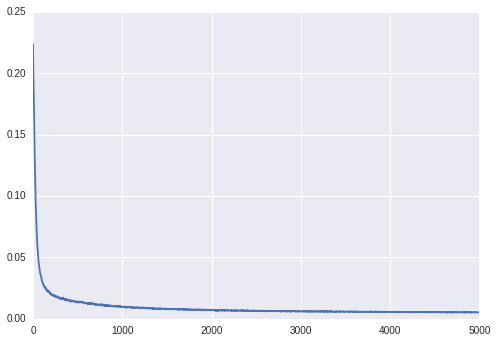

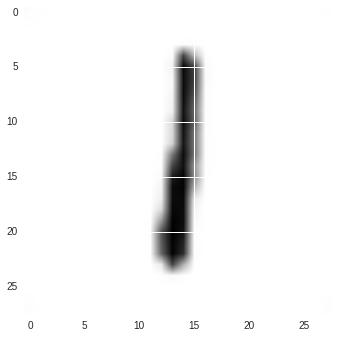

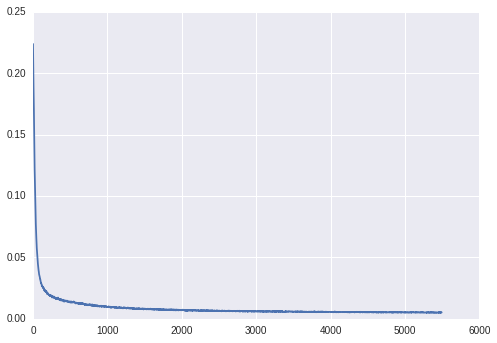

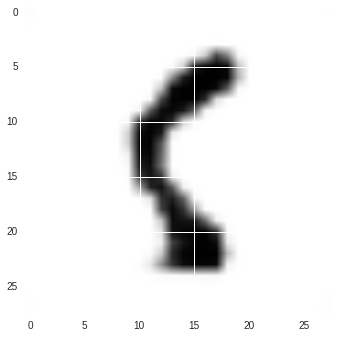

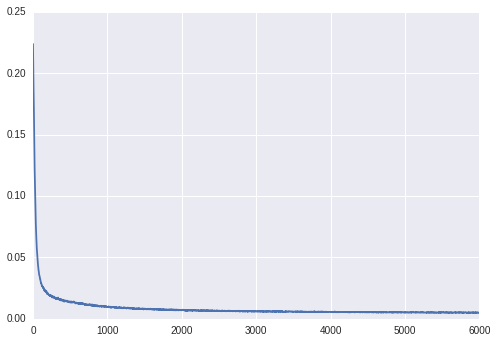

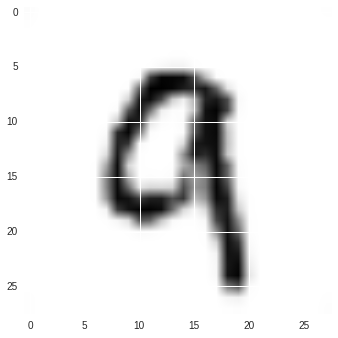

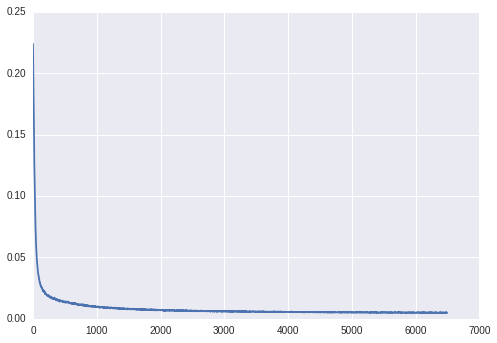

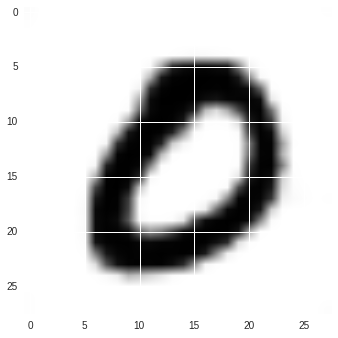

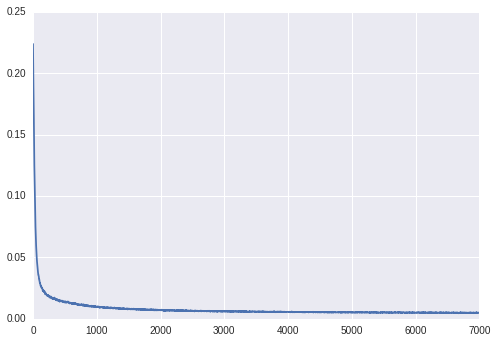

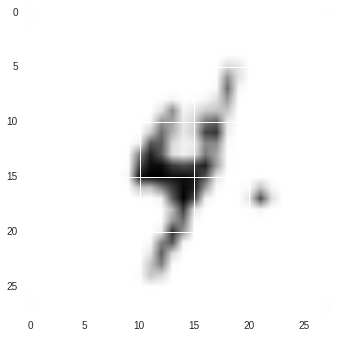

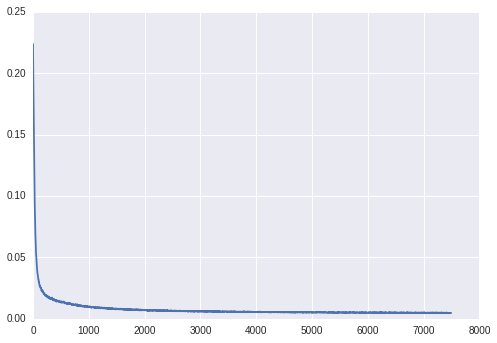

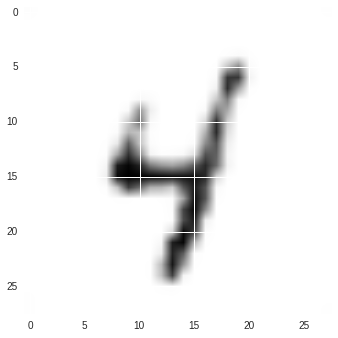

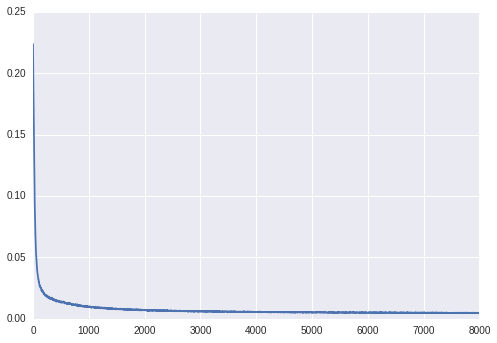

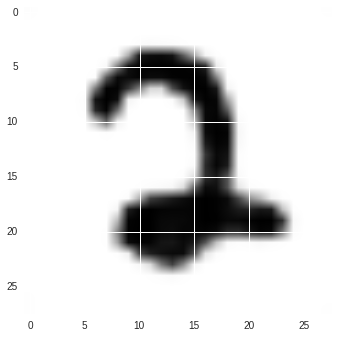

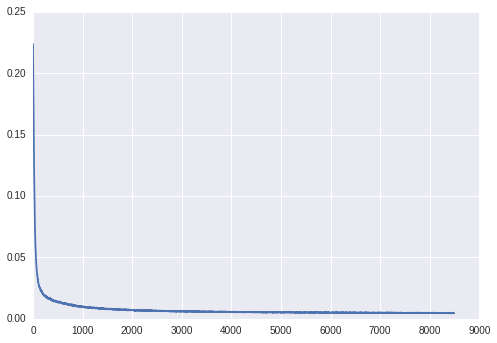

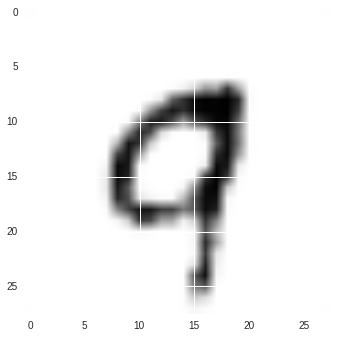

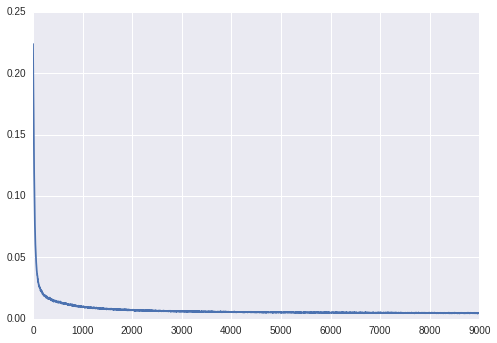

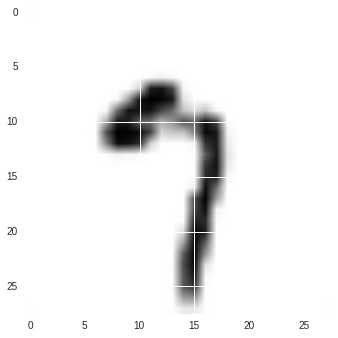

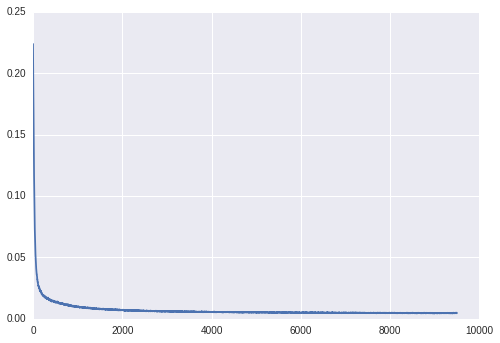

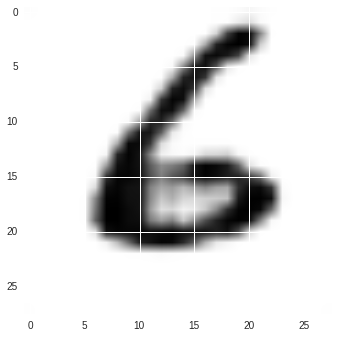

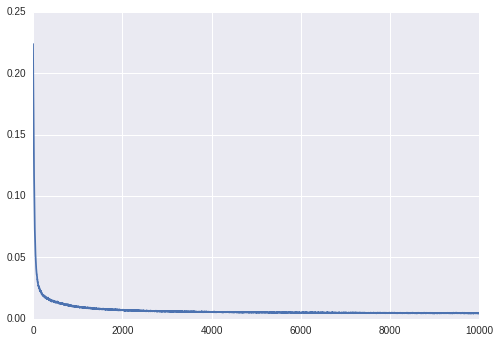

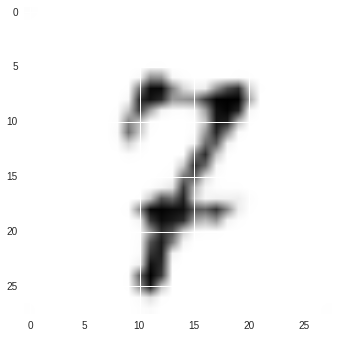

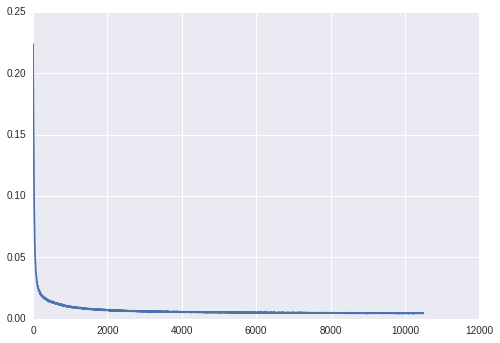

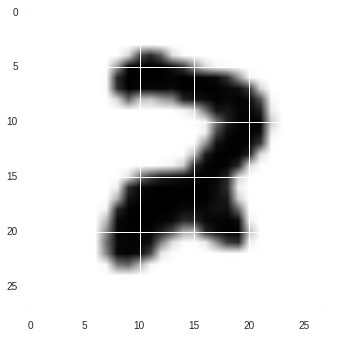

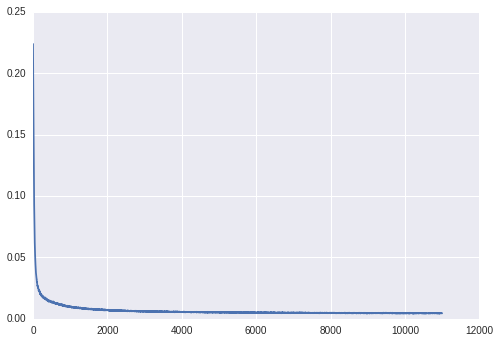

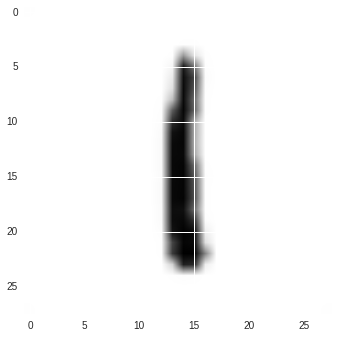

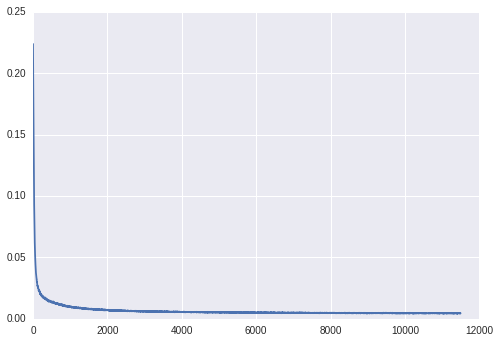

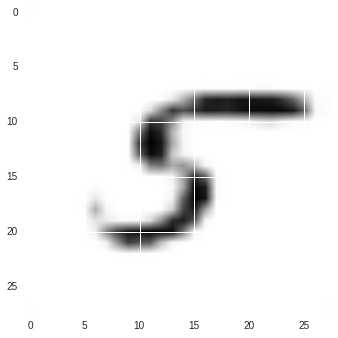

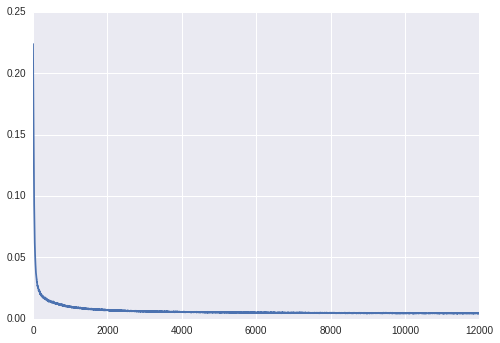

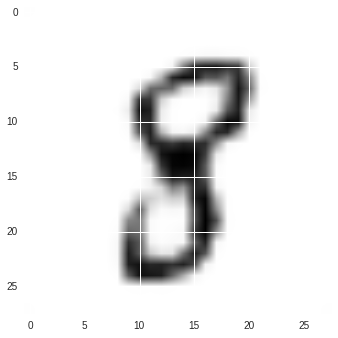

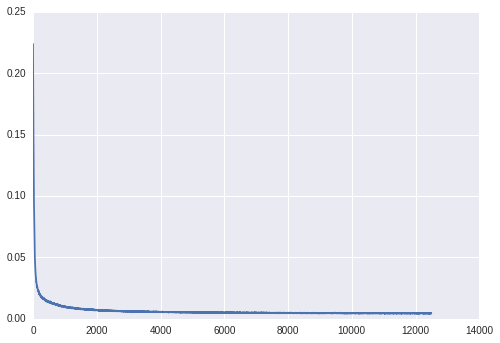

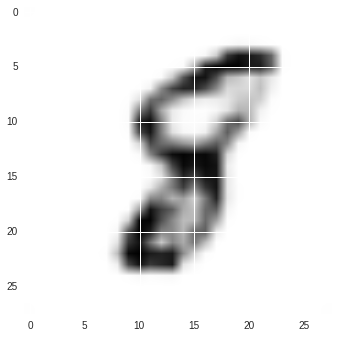

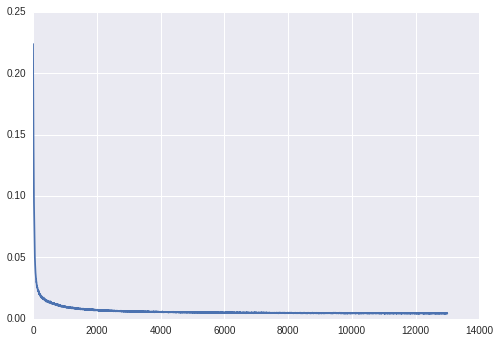

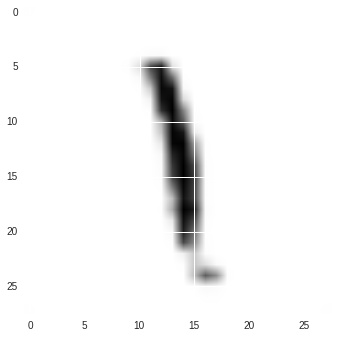

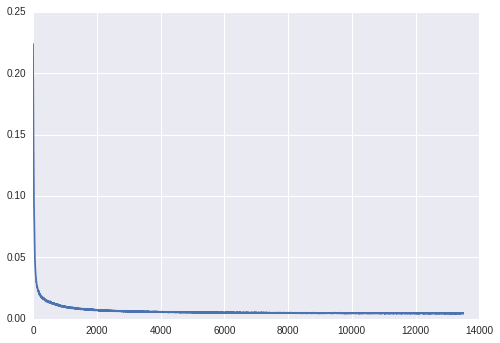

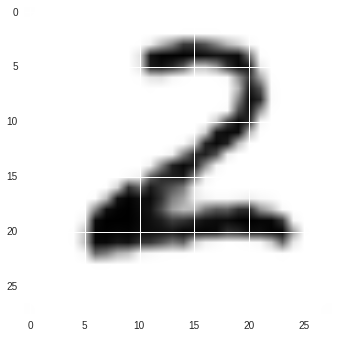

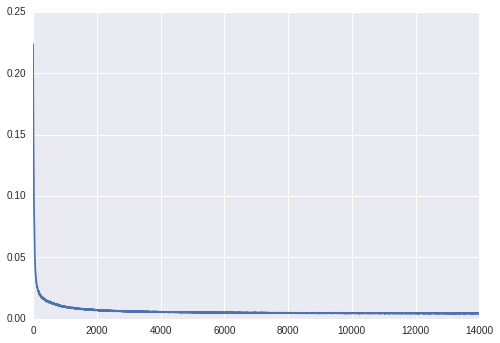

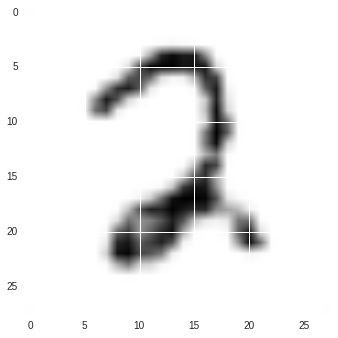

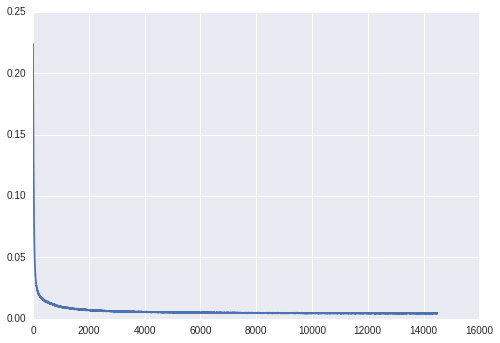

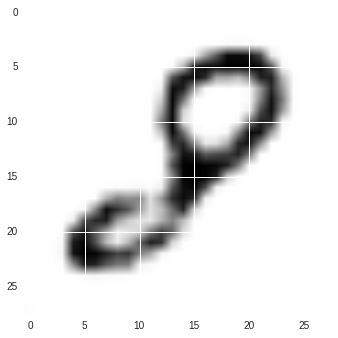

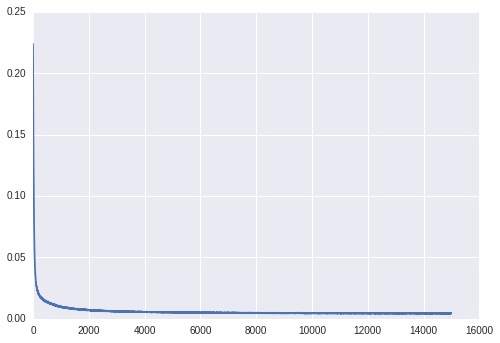

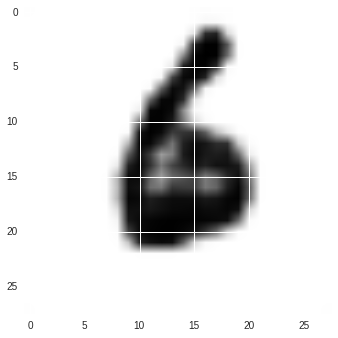

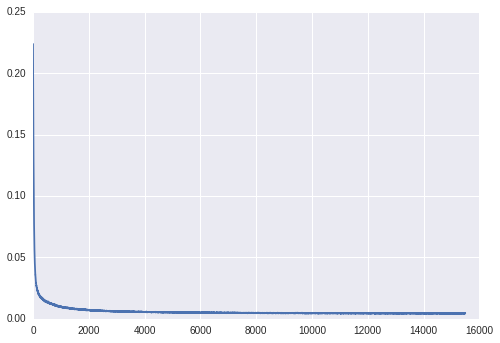

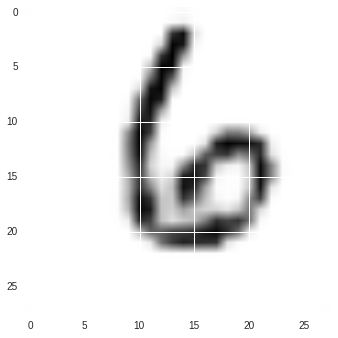

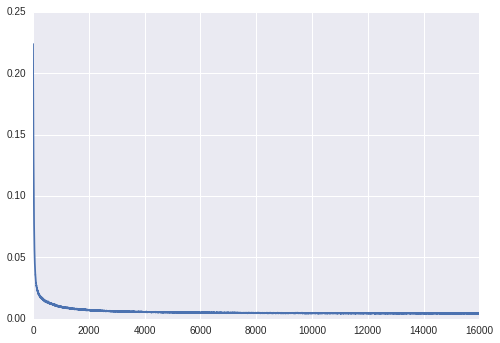

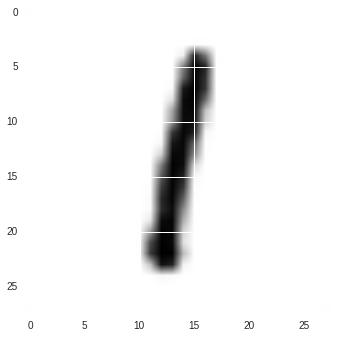

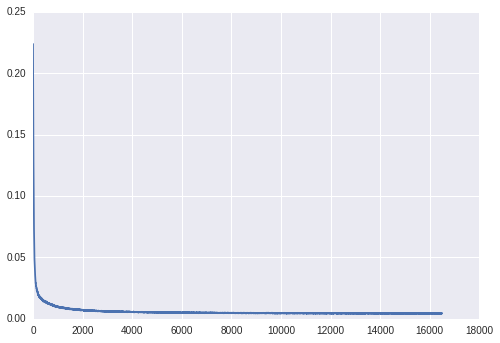

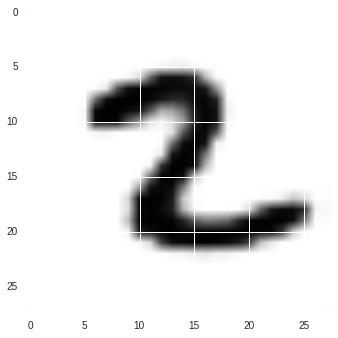

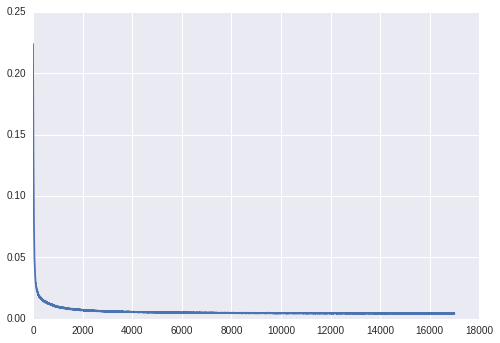

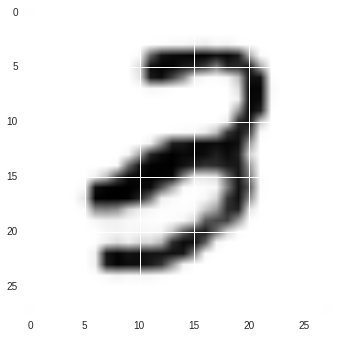

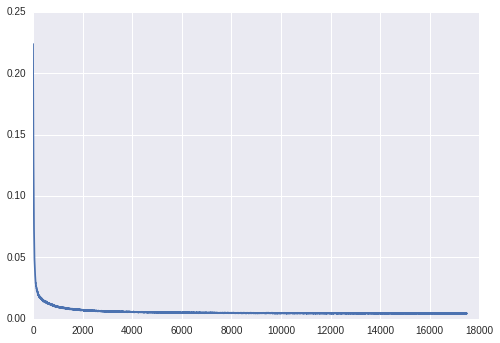

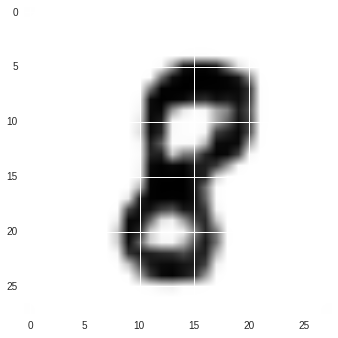

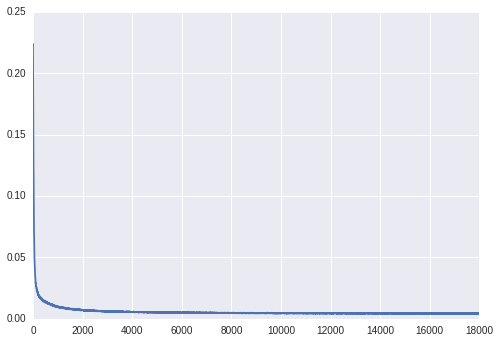

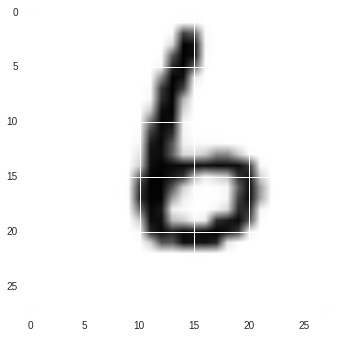

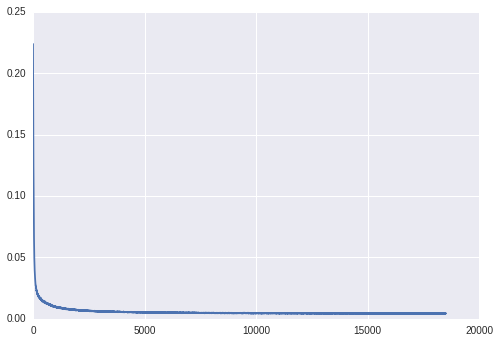

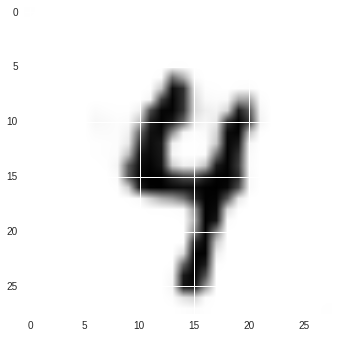

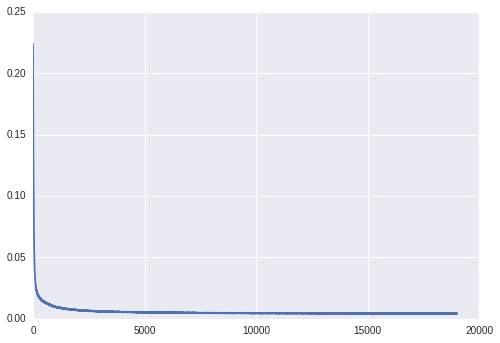

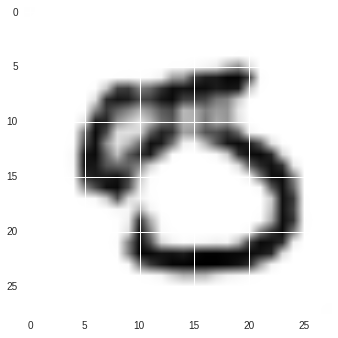

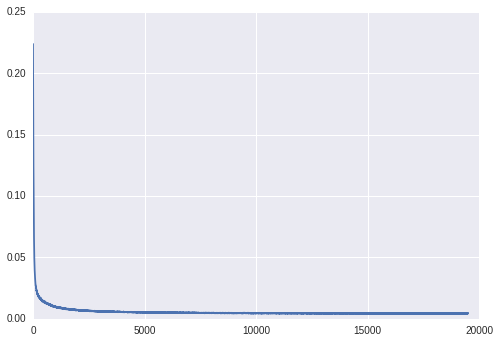

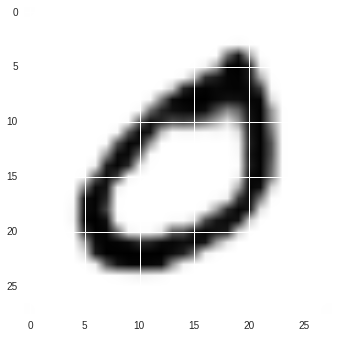

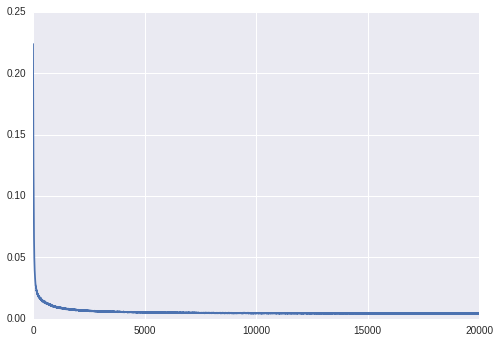

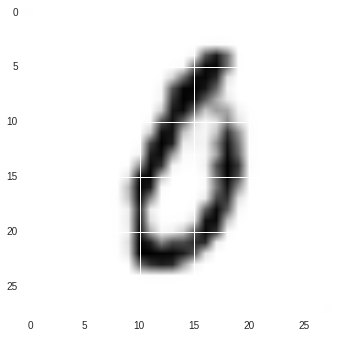

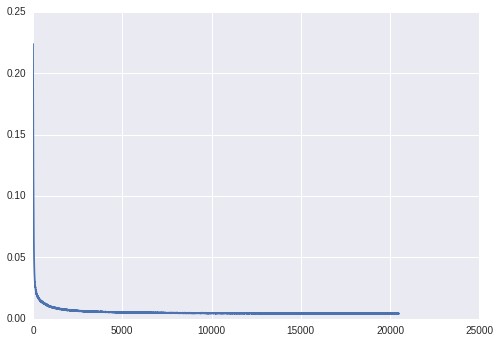

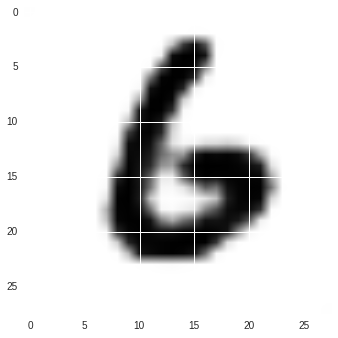

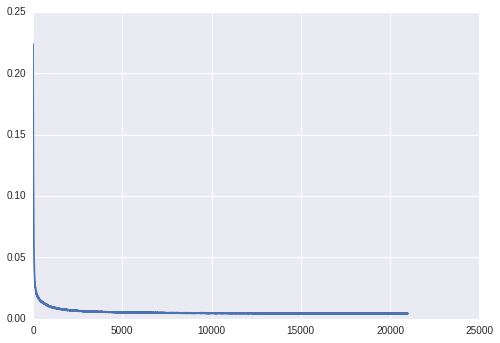

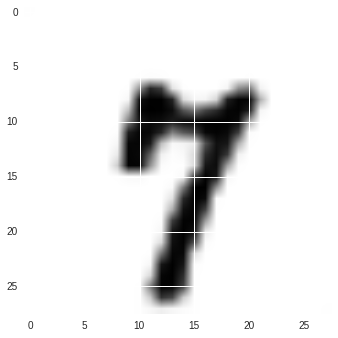

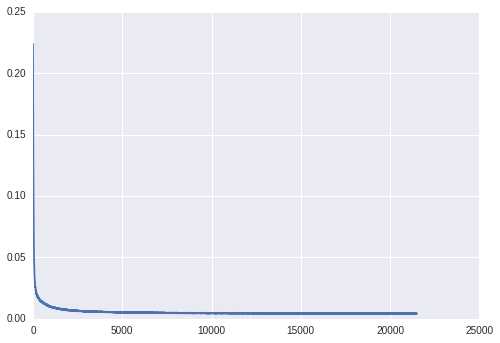

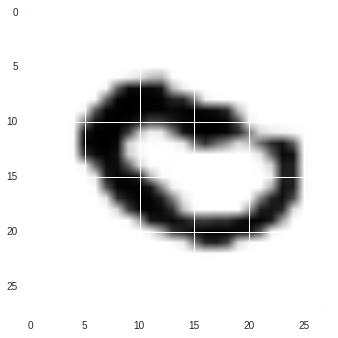

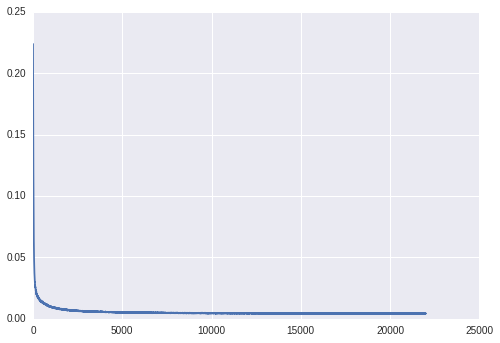

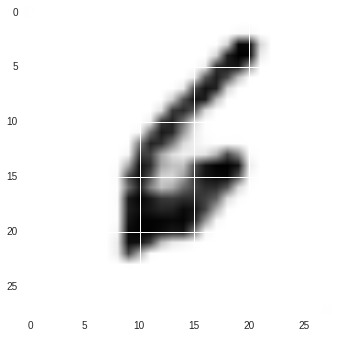

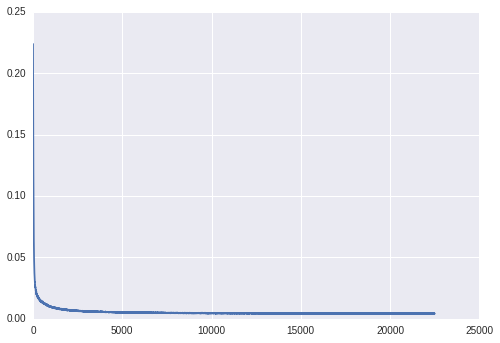

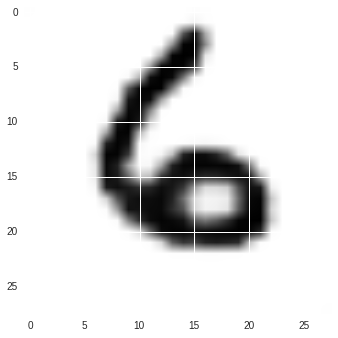

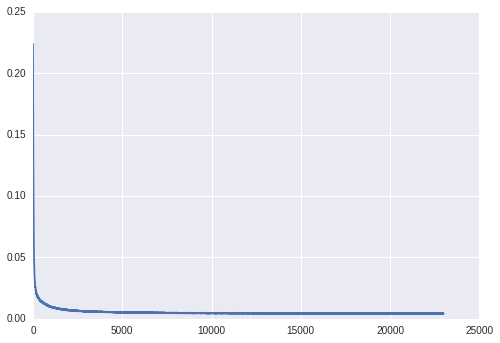

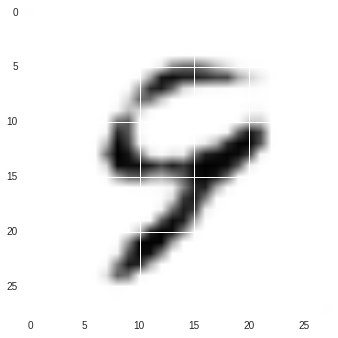

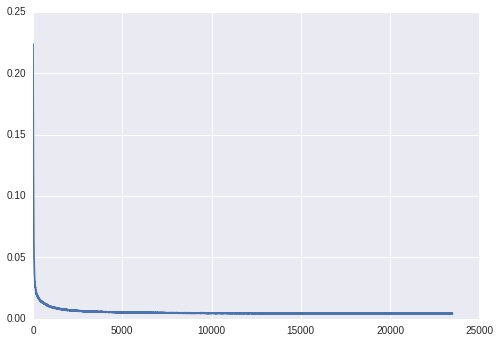

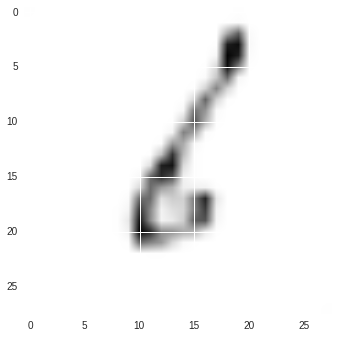

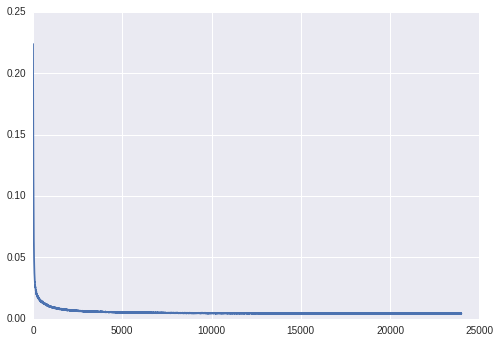

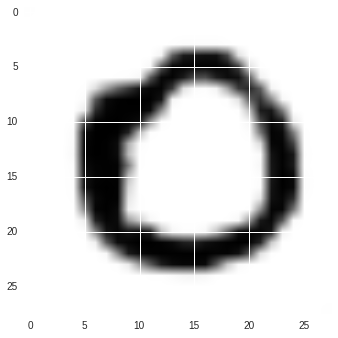

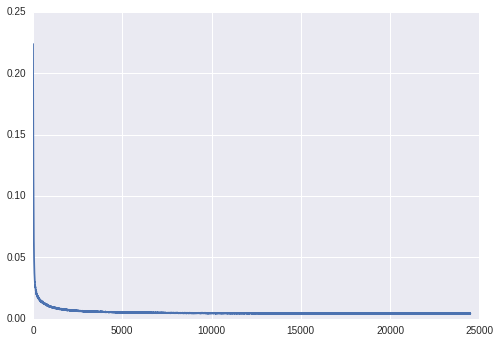

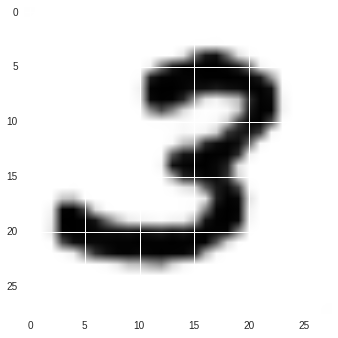

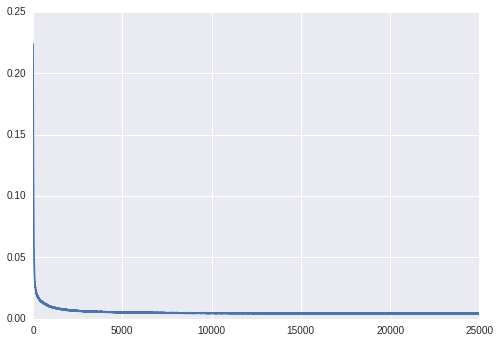

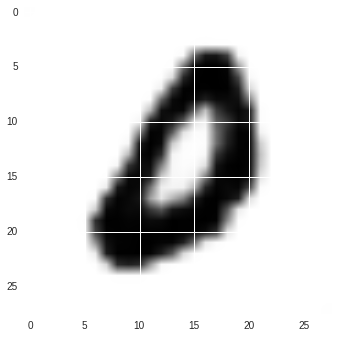

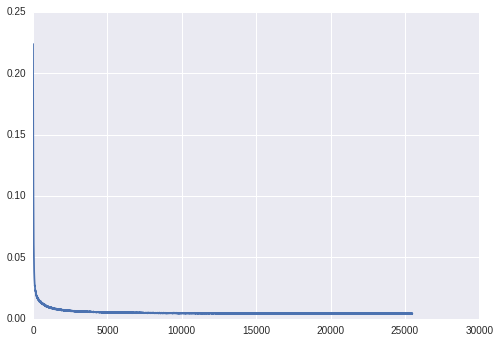

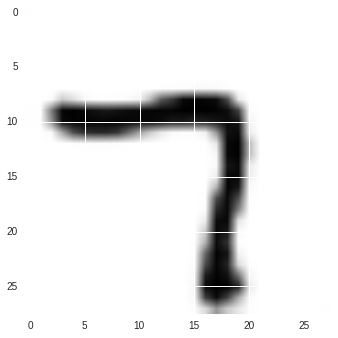

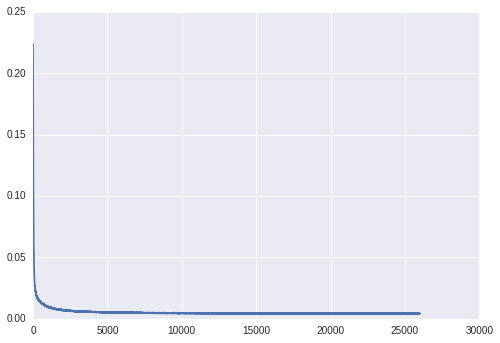

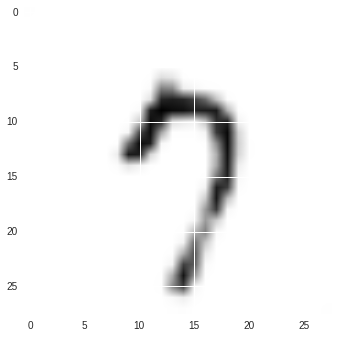

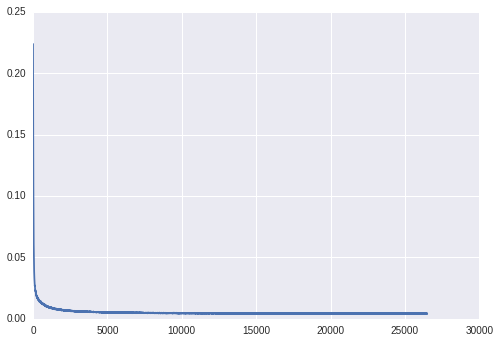

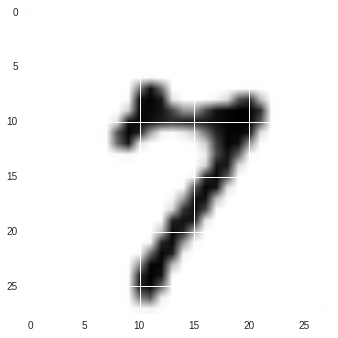

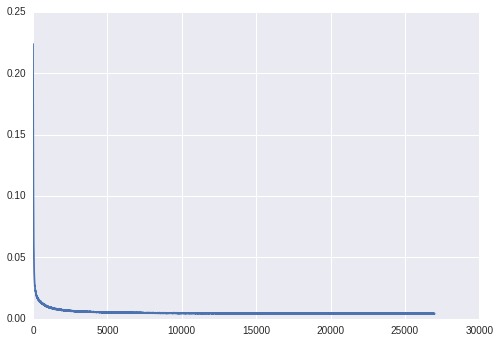

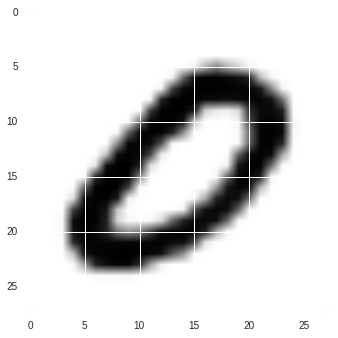

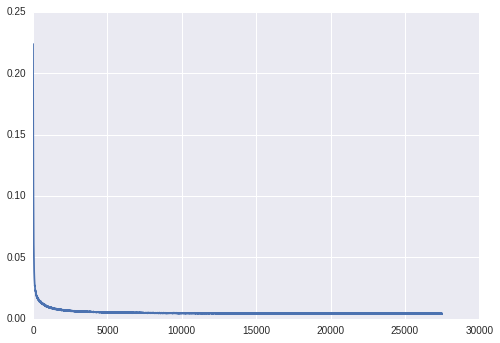

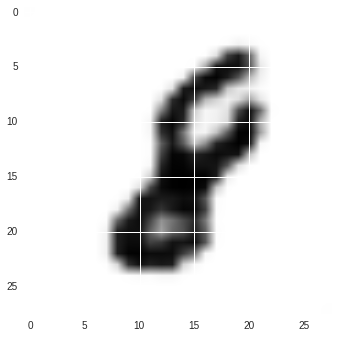

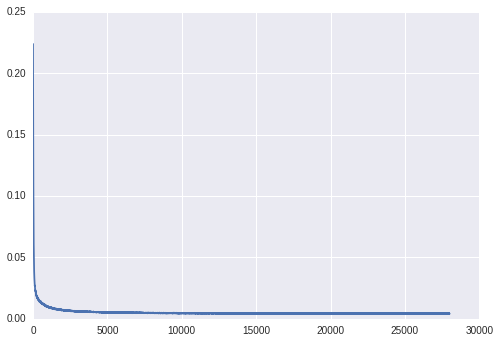

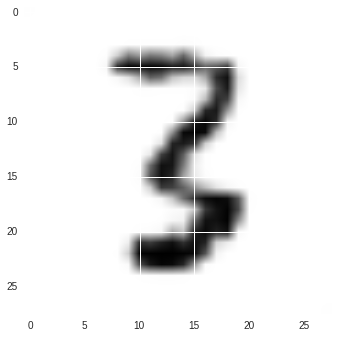

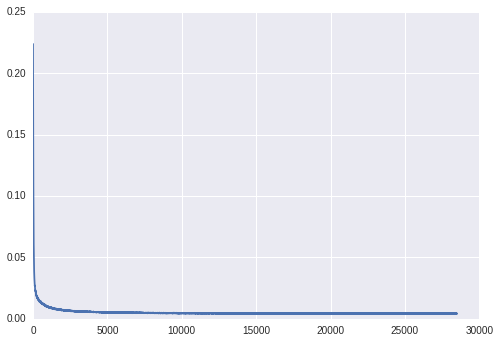

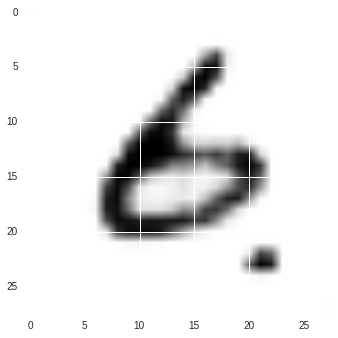

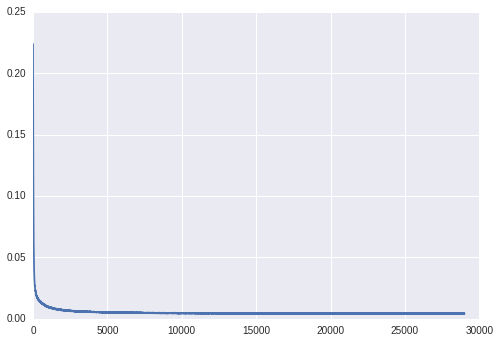

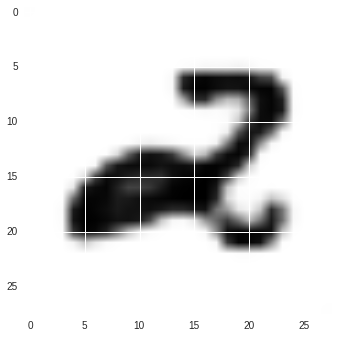

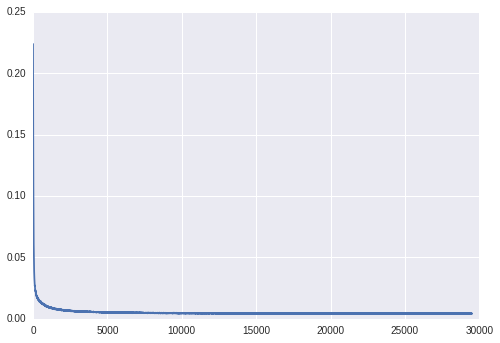

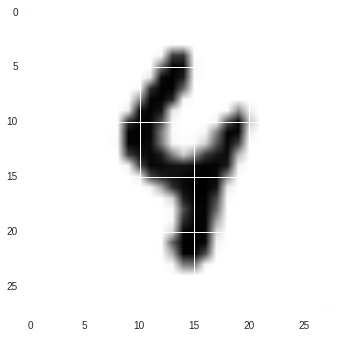

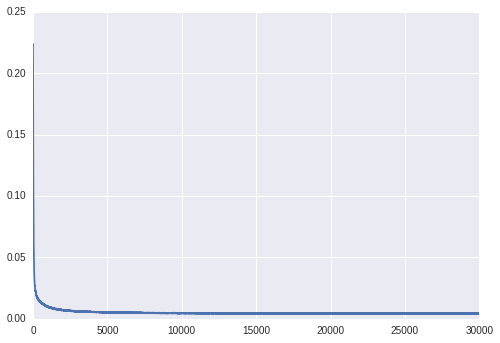

KeyboardInterrupt: 

In [57]:
batch_size = 200
step = 1


#print "batch_y:", batch_y
# plt.scatter(extra_features_data[0], extra_features_data[1])
# plt.show() 

def show_image(image_mat, index):
    print np.min(image_mat[index,:,:,0]),np.max(image_mat[index,:,:,0])

    plt.imshow(image_mat[index,:,:,0])
    plt.show()

    
# show_image(image_data_data, 0)
# show_image(image_data_data, 1)
# show_image(image_data_data, 2)
# show_image(image_data_data, 3)

image_data_data, _ = mnist.train.next_batch(2) 
image_data_data = image_data_data.reshape(2, 28, 28,1 )
plt.imshow(image_data_data[0,:,:,0])
plt.show()
# step = 0
while step * batch_size < 10000000000:
    image_data_data, _ = mnist.train.next_batch(100) 
    image_data_data = image_data_data.reshape(100, 28, 28,1 )


    _, batch_cost = sess.run([autoencoder_optimizer, autoencoder_loss], feed_dict={image_data: image_data_data})
    batch_costs.append(batch_cost)
    if  step % 500 == 0:
        autoencoder_result = sess.run(AE_output, feed_dict={image_data: image_data_data})

         
#         print ("Iter " + str(step*batch_size) + ", Minibatch Y Loss= ", 
#             str(y_loss_fetched), "Joint cost:", str(joint_loss),
#                "Autoencoder cost:", str(autoencoder_loss_fetched))
        
#         print np.max(autoencoder_result), np.min(autoencoder_result)

        plt.imshow(autoencoder_result[0,:,:,0])
        plt.show()
#         plt.imshow(image_data_data[0,:,:,0])
#         plt.show()
#         plt.scatter(list(batch_y_regression.reshape([-1])), y_guess)
#         plt.show()
        moving_window_size = 5
#         #plt.plot(batch_costs[moving_window_size:-moving_window_size])
        plt.plot(np.convolve(batch_costs, 
                             np.ones(moving_window_size)/moving_window_size)[moving_window_size:-moving_window_size])
        plt.show()
        
        
       

    step += 1
print "Optimization Finished!"

In [61]:
# -*- coding: utf-8 -*-

""" Convolutional Neural Network for MNIST dataset classification task.

References:
    Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based
    learning applied to document recognition." Proceedings of the IEEE,
    86(11):2278-2324, November 1998.

Links:
    [MNIST Dataset] http://yann.lecun.com/exdb/mnist/

"""
tf.reset_default_graph()

from __future__ import division, print_function, absolute_import

import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression

# Data loading and preprocessing
import tflearn.datasets.mnist as mnist
X, Y, testX, testY = mnist.load_data(one_hot=True)
X = X.reshape([-1, 28, 28, 1])
testX = testX.reshape([-1, 28, 28, 1])

# Building convolutional network
network = input_data(shape=[None, 28, 28, 1], name='input')

network = conv_2d(network, 32, 3, activation='relu', regularizer="L2")
bottom_conv = network
network = max_pool_2d(network, 2)
network = local_response_normalization(network)
network = conv_2d(network, 64, 3, activation='relu', regularizer="L2")
network = max_pool_2d(network, 2)
network = local_response_normalization(network)
network = fully_connected(network, 128, activation='tanh')
network = dropout(network, 0.8)
network = fully_connected(network, 256, activation='tanh')
network = dropout(network, 0.8)
network = fully_connected(network, 10, activation='softmax')
network = regression(network, optimizer='adam', learning_rate=0.01,
                     loss='categorical_crossentropy', name='target')

# Training
# model = tflearn.DNN(network, tensorboard_verbose=0)
model.fit({'input': X}, {'target': Y}, n_epoch=20,
           validation_set=({'input': testX}, {'target': testY}),
           snapshot_step=100, show_metric=True, run_id='convnet_mnist')

Training Step: 16999  | total loss: 0.29983
| Adam | epoch: 019 | loss: 0.29983 - acc: 0.9323 -- iter: 42176/55000


KeyboardInterrupt: 

In [69]:
# with sess.as_default():
print (bottom_conv.W.eval())
bottom_conv_weights = sess.run(bottom_conv.W)
# print bottom_conv_weights.shape
for i in range(bottom_conv_weights.shape[-1]):
    plt.imshow(bottom_conv_weights[:,:,0,i])
    plt.show()
    


ValueError: Cannot use the default session to evaluate tensor: the tensor's graph is different from the session's graph. Pass an explicit session to `eval(session=sess)`.